# Data Analysis Project
#### Goal: Analyze the relationship between customer review scores (review_score) and return rates (where order_status is "canceled")
Dataset used: Kaggle Brazilian E-Commerce Dataset (Olist)
1. Are lower review scores associated with higher return rates?
2. Do certain product categories have higher return rates?
3. Are return rates different by season (monthly variation)?

## 1. Collect Data
#### - Download Dataset from Kalle, set path, and load CSV file

In [15]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")

print("Path to dataset files:", path)

Path to dataset files: /Users/yoonji/.cache/kagglehub/datasets/olistbr/brazilian-ecommerce/versions/2


#### - After downloading the dataset from Kaggle, check the set path and the list of files in the folder


In [16]:
import os

dataset_path = "/Users/yoonji/.cache/kagglehub/datasets/olistbr/brazilian-ecommerce/versions/2"
print(os.listdir(dataset_path))  # Check files in the folder

['olist_sellers_dataset.csv', 'product_category_name_translation.csv', 'olist_orders_dataset.csv', 'olist_order_items_dataset.csv', 'olist_customers_dataset.csv', 'olist_geolocation_dataset.csv', 'olist_order_payments_dataset.csv', 'olist_order_reviews_dataset.csv', 'olist_products_dataset.csv']


#### - Load and check CSV file data

In [17]:
import pandas as pd

# Set file paths
orders_path = dataset_path + "/olist_orders_dataset.csv"
reviews_path = dataset_path + "/olist_order_reviews_dataset.csv"
products_path = dataset_path + "/olist_products_dataset.csv"
order_items_path = dataset_path + "/olist_order_items_dataset.csv"
category_translation_path = dataset_path + "/product_category_name_translation.csv"
payments_path = dataset_path + "/olist_order_payments_dataset.csv"

# Load data
orders = pd.read_csv(orders_path)
reviews = pd.read_csv(reviews_path)
products = pd.read_csv(products_path)
order_items = pd.read_csv(order_items_path)
category_translation = pd.read_csv(category_translation_path)
payments = pd.read_csv(payments_path)


# Check data
print("Order Data:\n", orders.head())
print("\nReview Data:\n", reviews.head())
print("\nProduct Data:\n", products.head())
print("\nOrder Item Data:\n", order_items.head())
print("\nCategory Name Data:\n", category_translation.head())
print("\nPayment Data:\n", payments.head())

Order Data:
                            order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00     

## 2. Data Preprocessing
####  - Merge review scores and return status into one table

In [18]:
# Select necessary columns
orders_short = orders[['order_id', 'customer_id', 'order_status']]
reviews_short = reviews[['order_id', 'review_score']]
order_items_short = order_items[['order_id', 'product_id']]
products_short = products[['product_id', 'product_category_name']]

# Merge order and review data
df = pd.merge(orders_short, reviews_short, on="order_id")

# Create return status column (1 if canceled, else 0)
df['return_status'] = df['order_status'].apply(lambda x: 1 if x == 'canceled' else 0)

# Merge order item and product data
df = pd.merge(df, order_items_short, on="order_id")
df = pd.merge(df, products_short, on="product_id")

# Check data
print(df.head())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
2  0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   
3  bfc39df4f36c3693ff3b63fcbea9e90a  53904ddbea91e1e92b2b3f1d09a7af86   
4  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   

  order_status  review_score  return_status                        product_id  \
0    delivered             4              0  87285b34884572647811a353c7ac498a   
1    delivered             4              0  87285b34884572647811a353c7ac498a   
2    delivered             5              0  87285b34884572647811a353c7ac498a   
3    delivered             3              0  87285b34884572647811a353c7ac498a   
4    delivered             4              0  595fac2a385ac33a80bd5114aec74eb8   

   product_category_name  
0  utilidades_domesticas  
1  utilidades_domest

**Additional Analysis Required**<br>
Only return_status = 0 (not returned) rows are shown at the top, so we should check if returned orders exist(return_status == 1).

## 3. Exploratory Data Analysis (EDA)
#### - Basic statistics and relationship between review scores and return status

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check Basic stats
print(df.describe())

# Check for missing values
print("\Missing values in each column: \n", df. isnull().sum ())

# Counts by review score
print("\nData counts by review score:\n", df['review_score'].value_counts ())

# Counts by return status
print("\nData count by return status:\n", df['return_status'].value_counts()) # 1(returned), O (not returned)

# Return rate by review score
review_return_rate = df.groupby('review_score')['return_status'].mean() # Group data by review score to calculate average return rate
print(review_return_rate)

        review_score  return_status
count  112372.000000  112372.000000
mean        4.032473       0.004708
std         1.387849       0.068450
min         1.000000       0.000000
25%         4.000000       0.000000
50%         5.000000       0.000000
75%         5.000000       0.000000
max         5.000000       1.000000
\Missing values in each column: 
 order_id                    0
customer_id                 0
order_status                0
review_score                0
return_status               0
product_id                  0
product_category_name    1598
dtype: int64

Data counts by review score:
 review_score
5    63525
4    21315
1    14235
3     9423
2     3874
Name: count, dtype: int64

Data count by return status:
 return_status
0    111843
1       529
Name: count, dtype: int64
review_score
1    0.028381
2    0.009035
3    0.003608
4    0.000610
5    0.000677
Name: return_status, dtype: float64


**Explanation**<br>
Return data exists, so we can analyze the relationship between review scores and return rates.

#### - Data Visualization

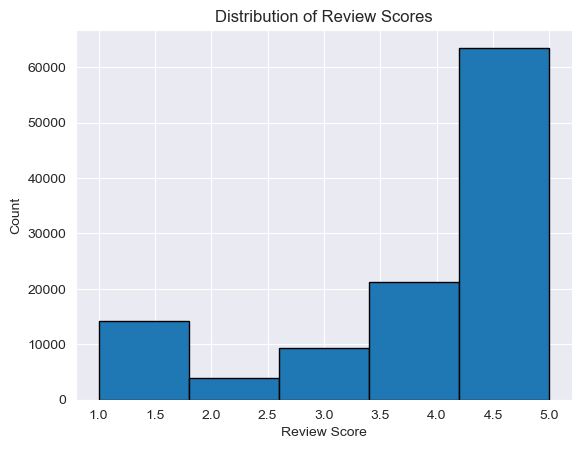

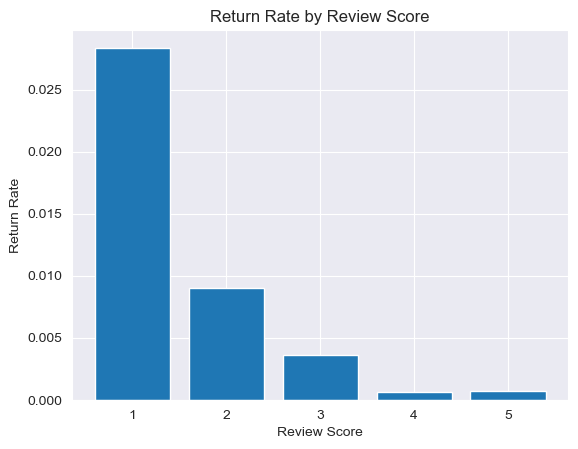

In [20]:
# Histogram of review scores
plt.hist(df['review_score'], bins=5, edgecolor='black')
plt.xlabel ("Review Score")
plt.ylabel ("Count")
plt.title("Distribution of Review Scores")
plt.show()

# Bar chart: return rate by review score
plt.bar(review_return_rate.index, review_return_rate.values)
plt.xlabel('Review Score')
plt.ylabel('Return Rate')
plt.title('Return Rate by Review Score')
plt.show()

               review_score  return_status
review_score       1.000000      -0.120858
return_status     -0.120858       1.000000


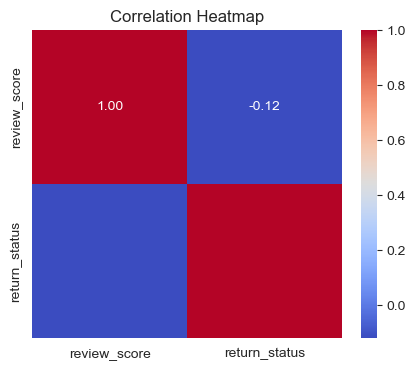

In [21]:
# Correlation between review score and return status
correlation = df[['review_score', 'return_status']].corr()
print(correlation)
# correlation = -0.12, weak negative relationship

# Heatmap of correlation
plt.figure(figsize=(5, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
# Red (1.00): Strong Positive Relationship (itself)
# Blue (-0.12): Weak Negative Relationship

#### - Result Analysis
- Correlation coefficient<br>
correlation = -0.12: Weak negative correlation
Lower review scores are slightly associated with a higher return rate, but the relationship is not strong.

- Heatmap analysis<br>
The correlation between review_score and return_status is -0.12 (blue), meaning a slightly increased return rate with lower scores. However, the relationship is not strong, so there may be more influential factors.

- Additional Analysis Required:<br>
Relationship between price and return rate
Delivery time and return status
Return rate by product category

## 4. Statistical Analysis and Hypothesis Testing
#### - T-test for difference in return rates between low and high review scores
Hypotheses:<br>
H₀: No difference in return rates between low and high score groups<br>
H₁: Low score group has higher return rates

In [22]:
from scipy.stats import ttest_ind

# t-test
low = df[df['review_score'] <= 2]['return_status']
high = df[df['review_score'] >= 4]['return_status']

t_stat, p_value = ttest_ind(low, high, equal_var=False) # ttest_ind(x, y)
print("t-statistic:", t_stat, "p-value:", p_value)

t-statistic: 20.571767865353408 p-value: 5.514690293693966e-93


**Explanation**<br>
p-value < 0.05: Reject H₀ — there is a statistically significant difference in return rates based on review score.

#### - ANOVA test for return rate differences by product category
Hypotheses:<br>
H₀: No difference in return rates across product categories<br>
H₁: At least one category has a different return rate

In [23]:
from scipy.stats import f_oneway

# Merge English category names: Check the category name
merged_df = pd.merge(products, category_translation, on='product_category_name', how='left')
df = pd.merge(df, merged_df[['product_id', 'product_category_name_english']], on='product_id', how='left')
print("Product Category Name in English:\n", df['product_category_name_english'].unique())

# Groups for ANOVA: Extract groups to use for comparing return rates by category
electronics = df[df['product_category_name_english'] == 'electronics']['return_status']
furniture = df[df['product_category_name_english'] == 'furniture_decor']['return_status']
fashion = df[df['product_category_name_english'] == 'fashion_male_clothing']['return_status']

# Sample size
print("\nThe number of data in each category")
print("Electronics:", len(electronics))
print("Furniture:", len(furniture))
print("Fashion:", len(fashion))

# ANOVA
anova_result = f_oneway(electronics, furniture, fashion)
print("\nF-statistic:", anova_result.statistic, "p-value:", anova_result.pvalue)

Product Category Name in English:
 ['housewares' 'perfumery' 'auto' 'pet_shop' 'stationery' nan
 'furniture_decor' 'office_furniture' 'garden_tools'
 'computers_accessories' 'bed_bath_table' 'toys' 'telephony'
 'health_beauty' 'electronics' 'baby' 'cool_stuff' 'watches_gifts'
 'air_conditioning' 'sports_leisure' 'books_general_interest'
 'construction_tools_construction' 'small_appliances' 'food'
 'luggage_accessories' 'fashion_underwear_beach' 'christmas_supplies'
 'fashion_bags_accessories' 'musical_instruments'
 'construction_tools_lights' 'books_technical' 'costruction_tools_garden'
 'home_appliances' 'market_place' 'agro_industry_and_commerce'
 'party_supplies' 'home_confort' 'cds_dvds_musicals'
 'industry_commerce_and_business' 'consoles_games' 'furniture_bedroom'
 'construction_tools_safety' 'fixed_telephony' 'drinks'
 'kitchen_dining_laundry_garden_furniture' 'fashion_shoes'
 'home_construction' 'audio' 'home_appliances_2' 'fashion_male_clothing'
 'cine_photo' 'furniture_living

**Explanation**<br>
p-value = 0.8192 > 0.05: Do not reject H₀ — no statistically significant difference in return rates among the three categories.

#### - Chi-Square Test for independence between category and return status
Hypotheses:<br>
H₀: Product category and return status are independent<br>
H₁: Product category and return status are related



In [24]:
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(df['product_category_name'], df['return_status'])

# Chi-Square
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2, "p-value:", p)

Chi-square statistic: 207.70715362160462 p-value: 4.294503050782418e-15


**Explanation**<br>
p-value < 0.05: Reject H₀ — product category and return status are related.

#### - Linear Regression: Does review score influence return rate?
Hypotheses:<br>
H₀: Review score has no impact on return rate<br>
H₁: Lower review score increases return rate



In [25]:
import statsmodels.api as sm

# Set the independent variable (x) and dependent variable (y)
X = df[['review_score']]
y = df['return_status']

# Add a constant term (with intercept)
X = sm.add_constant(X)
# Without an intercept, the line must pass through (0,0). Adding an intercept allows you to find the best-fit regression line even if the data does not go past the origin.

# Regression model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          return_status   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1666.
Date:                Sat, 29 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:48:10   Log-Likelihood:             1.4272e+05
No. Observations:              112372   AIC:                        -2.854e+05
Df Residuals:                  112370   BIC:                        -2.854e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0287      0.001     46.149   

**Explanation**<br>
- R² = 0.015 (very low): Only 1.5% of variance explained
- Coefficients:<br>
Intercept = 0.0287 (return rate when score = 0)<br>
review_score = -0.0060 (each 1-point increase in score reduces return rate by 0.6%)
- P>|t| = 0.000 (p-value < 0.05): reject H0 (statistically significant) → The lower the review score, the higher the return rate.
- Interpretation: The explanatory power is low → consider multiple regression with more variables.

#### - Multiple Linear Regression: Analyze other influencing factors

In [26]:
import numpy as np

# Create delivery delay variable
# Convert to a date type
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

# Create a late delivery status
orders['delivery_late'] = (orders['order_delivered_customer_date'] > orders['order_estimated_delivery_date']).astype(int)

# Extract only the columns
orders_late = orders[['order_id', 'delivery_late']]

# Calculate total price
# Calculate the total amount paid per order
order_price = payments.groupby("order_id")["payment_value"].sum().reset_index()

# Change name
order_price.rename(columns={"payment_value": "total_price"}, inplace=True)

# Merge with main df
df = pd.merge(df, orders_late, on='order_id', how='left')
df = pd.merge(df, order_price, on='order_id', how='left')

# Check if it was merged into df
print(df.columns)

# Multiple Regression
# Select features
features = ['review_score', 'delivery_late', 'total_price']

# Drop missing(NaN) or infinite(inf)
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=features + ['return_status'])

# Define the independent variable (x) and dependent variable (y)
X = df[features]
y = df['return_status']

# Adding Constants
X = sm.add_constant(X)

# Regression model
model = sm.OLS(y, X).fit()

# Print Result
print(model.summary())

Index(['order_id', 'customer_id', 'order_status', 'review_score',
       'return_status', 'product_id', 'product_category_name',
       'product_category_name_english', 'delivery_late', 'total_price'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:          return_status   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     698.4
Date:                Sat, 29 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:48:10   Log-Likelihood:             1.4293e+05
No. Observations:              112369   AIC:                        -2.858e+05
Df Residuals:                  112365   BIC:                        -2.858e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                            

**Explanation**<br>
- R² = 0.018 (still low): Slight influence from variables
- P>|t| = 0.000 (p-value < 0.05): reject H0 → The lower the review score, the more delayed the delivery, the higher the probability of return.
- Interpretation: Price has a small impact<br>
→ Add more variables (category, region, payment type, etc.) for improved prediction<br>
→ Move to modeling stage for prediction



## 5. Modeling

In [27]:
from sklearn.model_selection import train_test_split
X = df[features]  # the descriptive variable we defined earlier
y = df['return_status']  # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93     22365
           1       0.04      0.91      0.07       109

    accuracy                           0.88     22474
   macro avg       0.52      0.89      0.50     22474
weighted avg       0.99      0.88      0.93     22474

[[19642  2723]
 [   10    99]]


**Explanation**<br>
Total test samples: 22,474<br>
Returned orders: 109 (highly imbalanced)
- Accuracy: 88%
- Recall: 0.91 (captures 91% of actual returns)<br>
- Precision: 0.04 (only 4% of predicted returns are correct) → Overpredicting returns<br>
- Additional Analysis Required: Apply SMOTE to handle imbalance



#### - Reduce data imbalance (SMOTE)

In [29]:
# SMOTE Oversampling
from imblearn.over_sampling import SMOTE

# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train) # only in train data

#### - Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create Random Forest Model
rf_model = RandomForestClassifier(random_state=42)

# Training (using oversampled data)
rf_model.fit(X_resampled, y_resampled)

# Predictions (using the original test set)
y_pred_rf = rf_model.predict(X_test)

# Performance evaluation output
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     22365
           1       0.06      0.65      0.11       109

    accuracy                           0.95     22474
   macro avg       0.53      0.80      0.54     22474
weighted avg       0.99      0.95      0.97     22474

[[21293  1072]
 [   38    71]]


**Explanation**<br>
- Accuracy: 0.95<br>
- Precision: 0.06 Percentage of predicted returns that are true returns (the probability that a return is true when it's called a return)<br>
- Recall: 0.65 Percentage of actual returns that were successfully predicted (how well did we catch them without missing them)<br>
- F1-score: 0.11 Harmonic mean of precision and recall (overall prediction quality)